

Agora vamos praticas tudo o que aprendemos no módulo 2 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o site do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAGED considerando as suas colunas.

8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

9. Avançado: Plote uma **regressão múltipla**.


# Import das Bibliotecas 

##  -Verificação e informações dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# leitura do arquivo
file = pd.read_csv('CAGEDEST_122018.txt', sep=';', decimal = ',', encoding="latin1", delimiter=";", low_memory = False)

In [3]:
#Transformação em dataframe
df = pd.DataFrame(file)

In [4]:
#leitura do dataframe
df.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1


In [5]:
df = pd.DataFrame(df[['Salário Mensal', 'Idade', 'Grau Instrução', 'Sexo', 'Raça Cor']])

In [6]:
#Tamanho do dataframe
df.shape

(2256752, 5)

In [7]:
#Leitura estatistica das varivéis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salário Mensal,2256752.0,1627.244223,2097.520547,0.0,1066.0,1271.0,1600.0,142830.0
Idade,2256752.0,32.314226,10.960189,10.0,23.0,30.0,39.0,103.0
Grau Instrução,2256752.0,6.595547,1.548538,1.0,6.0,7.0,7.0,9.0
Sexo,2256752.0,1.413703,0.492497,1.0,1.0,1.0,2.0,2.0
Raça Cor,2256752.0,5.254456,3.066560,1.0,2.0,6.0,8.0,9.0


# Variável Salário Mensal

*     Análise exploratória do coluna
*     Tipo de dado
*     Análise gráfica da distribuição e dispersão 
*     Correção de assimetria

## Análise da variável Salário Mensal

        -Troca do tipo de dado
        -Qual o maior e menor salário
        -Qual o salário que tem aparece mais no dataframe
        -Estados com maiores salários
      

In [8]:
print(f'O maior salário da {df["Salário Mensal"].max()} \
e o menor salário é {df["Salário Mensal"].min()}')

O maior salário da 142830.0 e o menor salário é 0.0


## Análise de salários zerados

#### Analisar pro que há salários zerados no dataframe? <br> E se existe menores de 16 anos recebendo salário.


In [9]:
#Quantidade de valores zerados
valores_zerados = df[df['Salário Mensal'] == 0]
print('Quandidade de valores zerados na variável: ',valores_zerados.agg('count')[16:17])

Quandidade de valores zerados na variável:  Series([], dtype: int64)


In [10]:
#análise das linhas que possuem o salário como zerado
grouped = df.groupby('Salário Mensal').get_group(0)

In [11]:
#Média de idade que possue o salário zerado
zerados_idade = pd.DataFrame(df.groupby(df['Salário Mensal'] == 0)['Idade'].agg('mean'))
zerados_idade.round(0)

,Idade
Salário Mensal,
False,32.0
True,33.0


## Troca do dtype 

In [12]:
df['Salário Mensal'].dtypes

dtype('float64')

In [13]:
df['Salário Mensal'] = (df['Salário Mensal']).astype('int32')

In [14]:
df['Salário Mensal'].head()

0     954
1    2500
2       0
3       0
4       0
Name: Salário Mensal, dtype: int32

### Para alguns tipos de visualizações, irei retirar uma amostra aleatória do Dataframe. Para o cálculo da amostra será considerado uma margem de erro de 5% e 95% grau de confiança.

#### A fórmula que adotarei para o cálcula da amostra será: 

In [15]:
# Fórmula padrão para definir o tamanho da amostra
n = 2256752 # tamanho da amostra
z = 1.96**2 # z score para nível de confiança de 5%
e = 0.05**2 # margem de erro de 5%
p = 0.5 # desvio padrão



dividendo = (z * (p*(1-p)))/(e)
dividor = (z * (p*(1-p)))/(e*n)
amostra = (dividendo)/(1+dividor)
print(f'Tamanho ideal para a amostra {amostra}')

Tamanho ideal para a amostra 384.094616746559


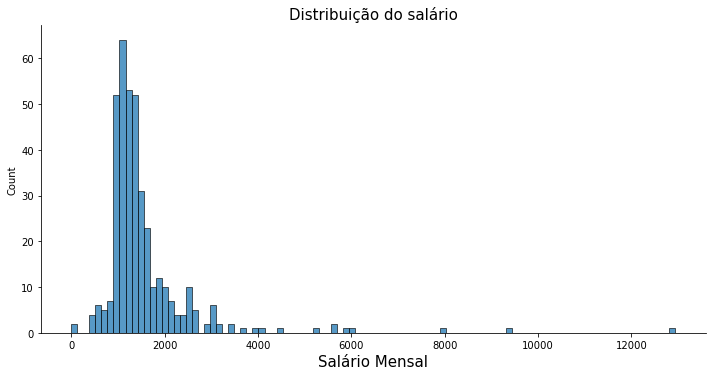

In [16]:
#retirando uma amostra aleatória para plotar a dispersão dos dados
df_sample = df.sample(n=385)
sns.displot(df_sample, x='Salário Mensal', bins=100,aspect=2)
plt.title('Distribuição do salário', fontsize=(15))
plt.xlabel('Salário Mensal', fontsize=15)
plt.show()

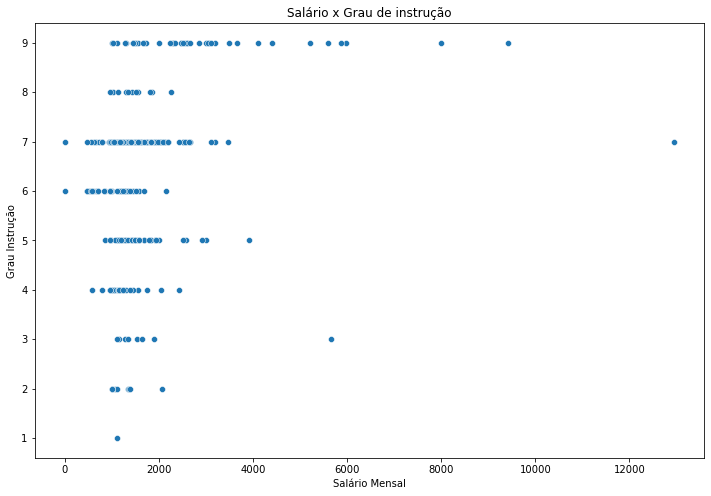

In [17]:
#Plot da dispersão da variável salário mensal pelo grau de instrução
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_sample, x="Salário Mensal", y="Grau Instrução")
plt.title('Salário x Grau de instrução', fontsize=(12))
plt.show()

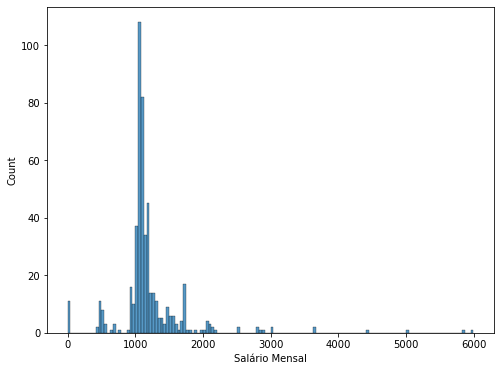

In [18]:
#Aplicar tranformação matemática para correção de assimetria
plt.figure(figsize=(8,6))
sns.histplot(df['Salário Mensal'][:500])
plt.show()

### Para o processo de correção de assimetria, irei fazer uma análise de outliers plotando um boxplot e fazer uma nromalização dos dados com o sklearning.preprocessing 

Text(0.5, 1.0, 'Boxplot - Salário Mensal ')

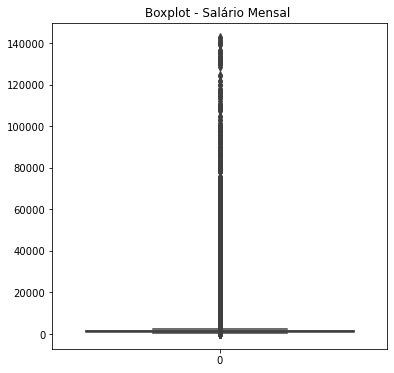

In [19]:
#BoxPlot antes da retirada dos outliers
plt.figure(figsize=(6,6))
sns.boxplot(data=df['Salário Mensal'])
plt.title('Boxplot - Salário Mensal ')

In [20]:
q3 = np.percentile(df['Salário Mensal'], 75) #Terceiro quartil
q1 = np.percentile(df['Salário Mensal'], 25) #primeiro quartil
fator = 1.5
iqr = fator * (q3 - q1) #diferença interquartil   

#Drop dos dados outliers
df.drop(df[df['Salário Mensal'] > iqr + np.percentile(df['Salário Mensal'], 75)].index, inplace=True)
df.drop(df[df['Salário Mensal'] < np.percentile(df['Salário Mensal'], 25) - iqr].index, inplace=True) 

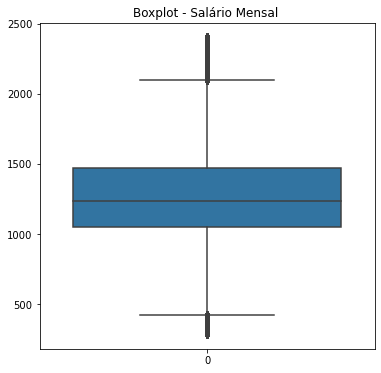

In [21]:
#BoxPlot depois da retirada dos outliers
plt.figure(figsize=(6,6))
sns.boxplot(data=df['Salário Mensal'])
plt.title('Boxplot - Salário Mensal ')
plt.show()

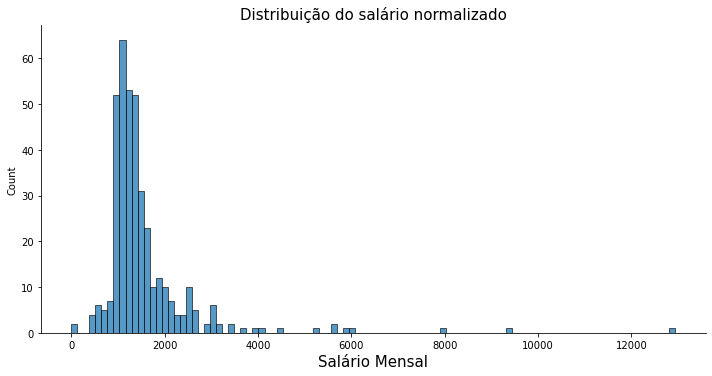

In [22]:
#normalização da variável Salário Mensal usando o preprocessing usando o Min Max
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(df_sample['Salário Mensal'])

sns.displot(df_sample, x='Salário Mensal', bins=100,aspect=2)
plt.title('Distribuição do salário normalizado', fontsize=(15))
plt.xlabel('Salário Mensal', fontsize=15)
plt.show()

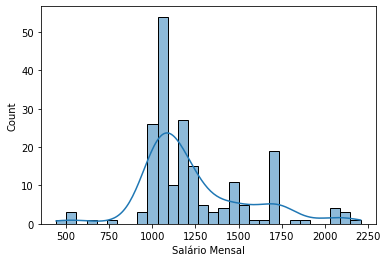

In [23]:
#Distribuição depois da limpeza de outliers
sns.histplot(df['Salário Mensal'][:200], kde=True, bins=30)
plt.show()

# Variável Idade



### Análise Exploratória da variável idade

*   Idade máxima e mínima 
*   Idades com maior ocorrência dentro do dataset
*   Distribuição e Dispersão
*   Grau de correlação entre a Idade e o Salário



Saber quantas pessoas menores de 16 recebem salário <br>
correlação de pessoas menores de 16 anos e salário 

In [24]:
print(f"Maior idade: {df['Idade'].max()} e menor idade: {df['Idade'].min()}")


Maior idade: 103 e menor idade: 10


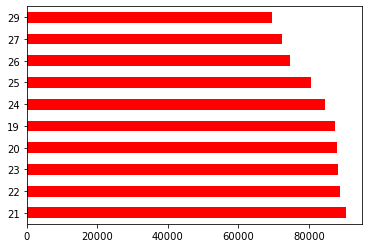

In [25]:
#As 10 idades que mais saem no dataset
idades1 = df['Idade'].value_counts()[:10].plot(kind='barh', color='r')


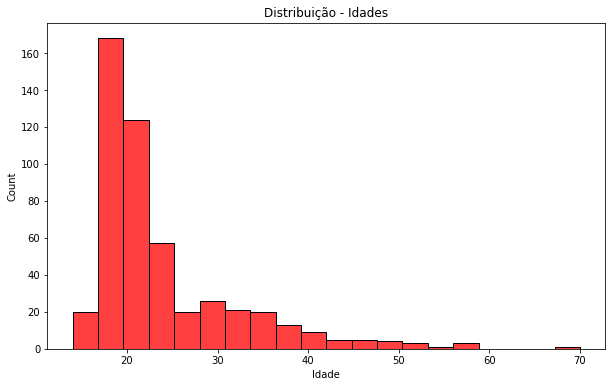

In [26]:
#Plot da distribuição de idades
idades = df['Idade'][:500]
plt.figure(figsize=(10,6))
sns.histplot(x=idades, bins=20, color='red')
plt.title("Distribuição - Idades")
plt.show()

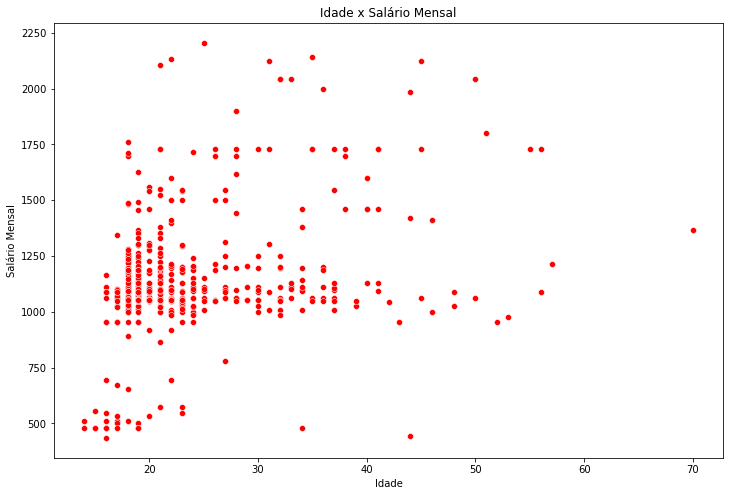

In [27]:
#Disperção dos dados em Idade pelo Salário Mensal
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x=idades, y="Salário Mensal", color='red', )
plt.title('Idade x Salário Mensal', fontsize=(12))
plt.show()

In [28]:
#Correlação da idade x Salário Mensal
columns = df[['Idade', 'Salário Mensal']]
columns.corr()

,Idade,Salário Mensal
Idade,1.000000,0.240032
Salário Mensal,0.240032,1.000000


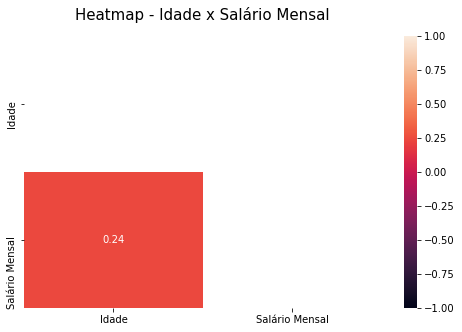

In [29]:
plt.figure(figsize=(8,5))

mask = np.triu(np.ones_like(columns.corr(), dtype= bool))
heatmap = sns.heatmap(columns.corr(), mask=mask, vmin=-1, vmax=1,
                     annot=True)
heatmap.set_title ('Heatmap - Idade x Salário Mensal', fontdict = {'fontsize': 15}, pad = 16)
plt.show()

### Baixa Correlação entre as variáveis Idade e Salário Mensal

# Variável Grau de instrução

## Análise exploratória variável - Grau Instrução 

*     Análise exploratória do coluna
*     Tipo de dado
*     Análise gráfica da distribuição e dispersão 
*     Correlação com a variável salário mensal



In [30]:
#Valores com maior incidência da coluna Grau de Instrução
df['Grau Instrução'].value_counts()

7    1196072
6     194123
5     189282
9     131860
4     118053
8      77591
2      58301
3      44849
1       7981
Name: Grau Instrução, dtype: int64

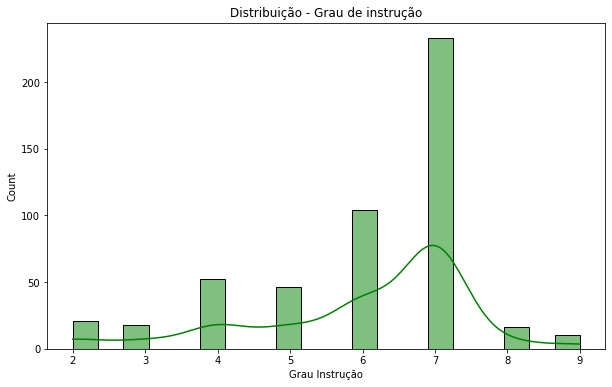

In [31]:
#Plot da distribuição de idades
idades = df['Grau Instrução'][:500]
plt.figure(figsize=(10,6))
sns.histplot(x=idades, bins=20, color='g', kde=True)
plt.title("Distribuição - Grau de instrução")


plt.show()

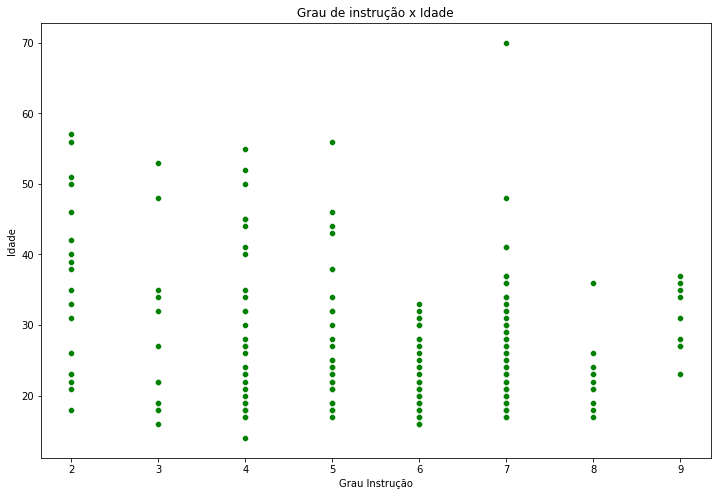

In [32]:
#Disperção dos dados em Grau de Instrução x Idade
x = df['Grau Instrução'][:300]
y = df['Idade'][:300]
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x=x, y=y, color='g', )
plt.title('Grau de instrução x Idade', fontsize=(12))
plt.show()

In [33]:
#Correlação da idade x Salário Mensal
columns = df[['Grau Instrução', 'Salário Mensal']]
columns.corr()

,Grau Instrução,Salário Mensal
Grau Instrução,1.000000,0.074785
Salário Mensal,0.074785,1.000000


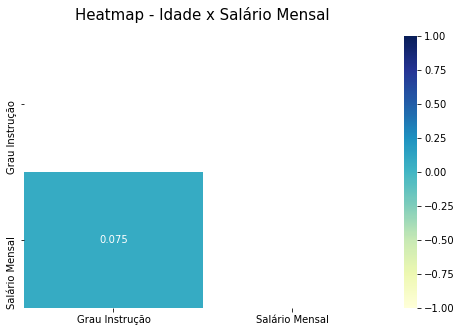

In [34]:
plt.figure(figsize=(8,5))

mask = np.triu(np.ones_like(columns.corr(), dtype= bool))
heatmap = sns.heatmap(columns.corr(), mask=mask, vmin=-1, vmax=1,
                     annot=True, cmap='YlGnBu')
heatmap.set_title ('Heatmap - Idade x Salário Mensal', fontdict = {'fontsize': 15}, pad = 16)
plt.show()

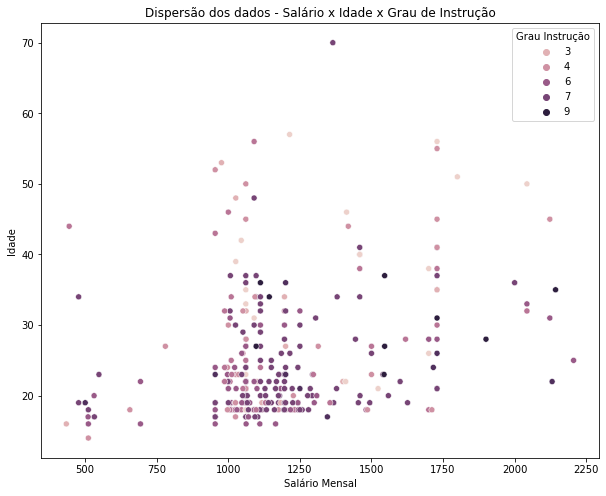

In [35]:
#Análise Idade x Grau Instrução x Salário
x = df['Salário Mensal'][:300]
y = df['Idade'][:300]
z = df['Grau Instrução'][:300]


plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x=x, y=y, hue=z)
plt.title("Dispersão dos dados - Salário x Idade x Grau de Instrução")
plt.show()

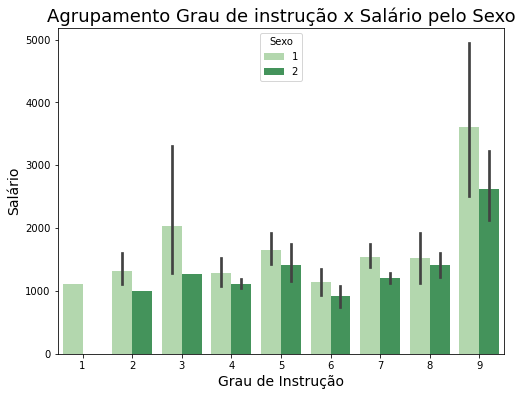

In [36]:
#Agrupamento Grau de instrução x Salário pelo Sexo
plt.figure(figsize=(8, 6)) 
sns.barplot(x="Grau Instrução", y='Salário Mensal',
            hue="Sexo", data=df_sample, 
            palette='Greens') 
  
plt.ylabel("Salário", size=14) 
plt.xlabel("Grau de Instrução", size=14) 
plt.title("Agrupamento Grau de instrução x Salário pelo Sexo", size=18) 
plt.show()

# Variável sexo





##  Análise exploratória da variável sexo

*   Análise da Coluna
*   Tipo de dado
*   Distribuição e dispersão dos dados
*   Correlação entre Sexo e Salário Mensal
*   Inferência estatística

In [37]:
#Valores da variável
print(f'Valores:\n{df.Sexo.head(10)}')

Valores:
0     1
7     2
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
Name: Sexo, dtype: int64


In [38]:
#Tamanho da coluna
print(f'Tamanho:\n{df.Sexo.shape}')

Tamanho:
(2018112,)


In [39]:
#Análise estatística
round(df.Sexo.describe(), 2)

count    2018112.00
mean           1.42
std            0.49
min            1.00
25%            1.00
50%            1.00
75%            2.00
max            2.00
Name: Sexo, dtype: float64

In [40]:
#Porcentagem de valores para o sexo Feminino e Masculino 
mask = df['Sexo'].value_counts(normalize=True)
print(f'Quantidade de valores para o sexo masculino: {round(mask[1]*100, 2)}%')
print(f'Quantidade de valores para o sexo feminino: {round(mask[2]*100, 2)}%')

Quantidade de valores para o sexo masculino: 58.3%
Quantidade de valores para o sexo feminino: 41.7%


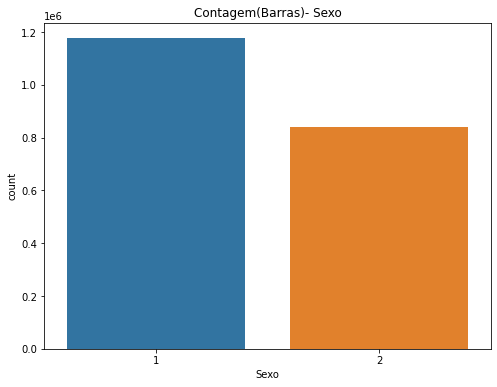

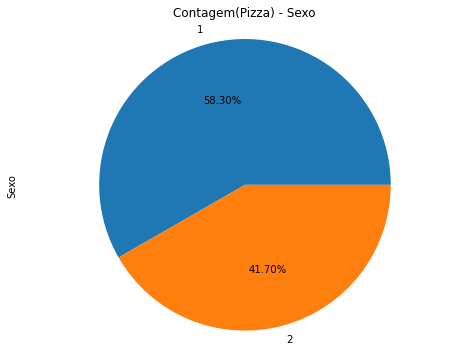

In [41]:
#Plot de Valores para os Sexos Femininos e Masculinos

#Gráfico de barras
plt.figure(figsize=(8,6))
sns.countplot(x="Sexo",data=df)
plt.title("Contagem(Barras)- Sexo", fontsize=(12))
plt.xlabel("Sexo", fontsize=(10))
plt.show()

#Gráfico de Pizza
plt.figure(figsize=(8,6))
df['Sexo'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f%%')
plt.title("Contagem(Pizza) - Sexo")
plt.axis('equal')
plt.show()


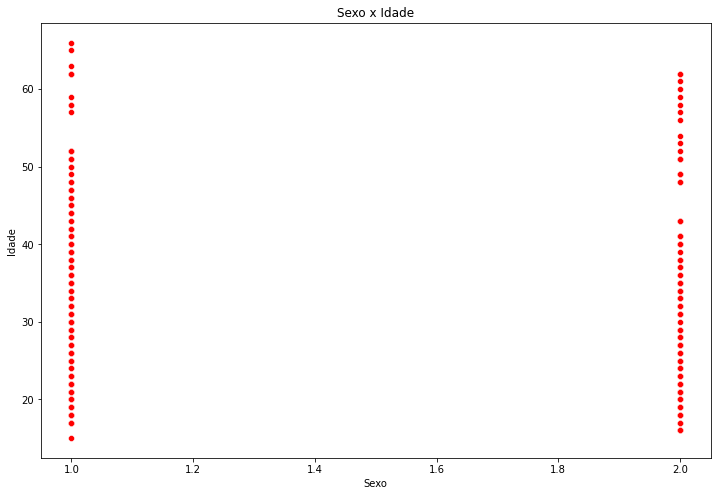

In [42]:
#Disperção dos dados em Idade pela Idade
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_sample, x='Sexo', y="Idade", color='red', )
plt.title('Sexo x Idade', fontsize=(12))
plt.show()

In [43]:
#Rename da coluna Salário Mensal
df = df.rename(columns = {'Salário Mensal' : 'SalarioMensal'})

In [44]:
#Média salarial por sexo 
df_query_fem = pd.DataFrame(df.query('Sexo == 2 & SalarioMensal > 1'))
df_query_mas = pd.DataFrame(df.query('Sexo == 1 & SalarioMensal > 1'))


media_fem = df_query_fem['SalarioMensal'].mean()
media_mas = df_query_mas['SalarioMensal'].mean()

In [45]:
print(f'Média salarial para mulheres: R$ {round(media_fem)}')
print(f'Média salarial para homens: R$ {round(media_mas)}')

Média salarial para mulheres: R$ 1226
Média salarial para homens: R$ 1339


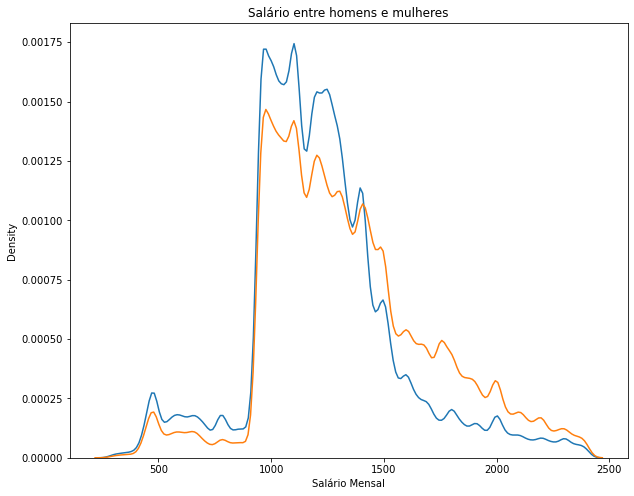

In [46]:
#Plot de salário entre homens e mulheres
#linha azul - homens
#linha laranja - mulheres
plt.figure(figsize=(10,8))
sns.kdeplot(data=df_query_fem, x='SalarioMensal',alpha=.5, legend='homens')
sns.kdeplot(data=df_query_mas, x='SalarioMensal',alpha=.5, legend='mulheres')
plt.xlabel('Salário Mensal')
plt.title('Salário entre homens e mulheres')
plt.show()

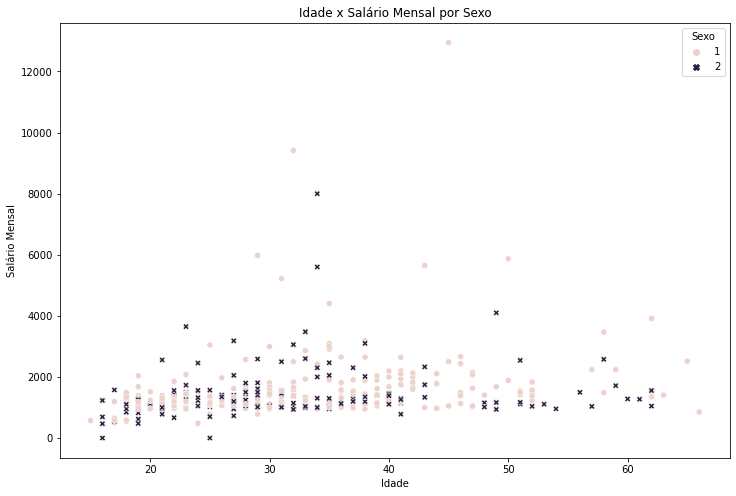

In [47]:
#Disperção dos dados da variável Sexo por Idade e Salário Mensal
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_sample, x= 'Idade', hue='Sexo', y="Salário Mensal", color='red', style='Sexo')
plt.title('Idade x Salário Mensal por Sexo', fontsize=(12))
plt.show()

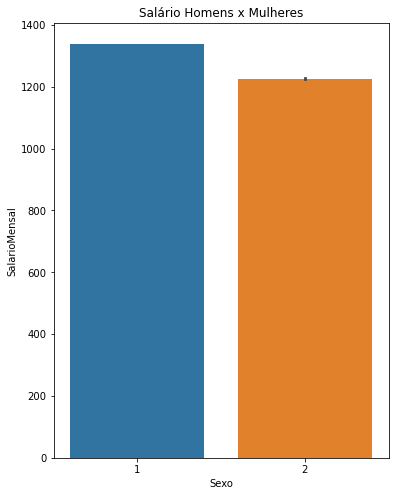

In [48]:
#Salário Homens x Mulheres
plt.figure(figsize=(6, 8)) 
sns.barplot(x="Sexo", y='SalarioMensal', data=df)
plt.title('Salário Homens x Mulheres')
plt.show()

In [49]:
#Correlação entre a variável idade x Salário Mensal
columns = df[['Sexo', 'SalarioMensal']]
columns.corr()

,Sexo,SalarioMensal
Sexo,1.000000,-0.154414
SalarioMensal,-0.154414,1.000000


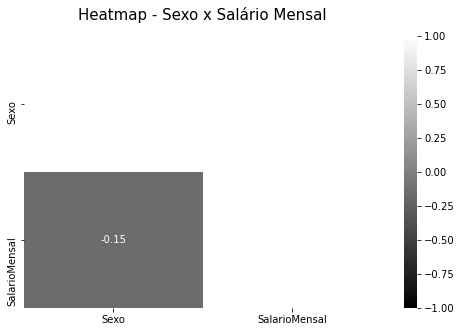

In [50]:
plt.figure(figsize=(8,5))

mask = np.triu(np.ones_like(columns.corr(), dtype= bool))
heatmap = sns.heatmap(columns.corr(), mask=mask, vmin=-1, vmax=1,
                     annot=True, cmap='gray')
heatmap.set_title ('Heatmap - Sexo x Salário Mensal', fontdict = {'fontsize': 15}, pad = 16)
plt.show()

# Variável Raça/Cor

## Análise exploratória variável - Raça/Cor

*     Análise exploratória do coluna
*     Tipo de dado
*     Relação entre Salário Mensal e Raça/Cor

In [51]:
#Valores da variável
mask_raca = df['Raça Cor']
print(f'Valores:\n{mask_raca.head(10)}')

Valores:
0     8
7     2
11    8
12    2
13    2
14    2
15    8
16    9
17    8
18    2
Name: Raça Cor, dtype: int64


In [52]:
#Análise estatística da coluna
round(mask_raca.describe(), 2)

count    2018112.00
mean           5.34
std            3.06
min            1.00
25%            2.00
50%            8.00
75%            8.00
max            9.00
Name: Raça Cor, dtype: float64

In [53]:
#Quantidade de valores de cada Raça
mask_raca.value_counts()

2    846994
8    750003
9    280066
4    124153
6      9100
1      7796
Name: Raça Cor, dtype: int64

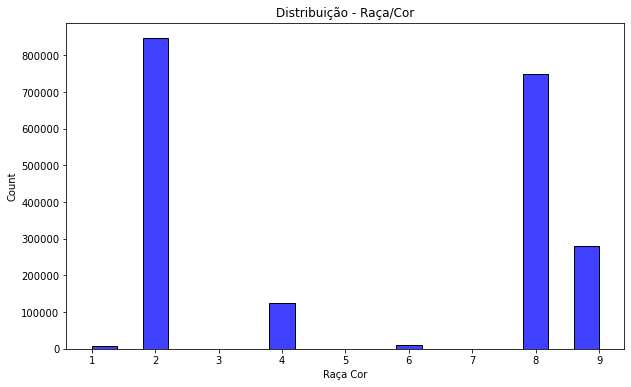

In [54]:
#Distribuição da coluna 
plt.figure(figsize=(10,6))
sns.histplot(x=mask_raca, bins=20, color='b')
plt.title("Distribuição - Raça/Cor")
plt.show()

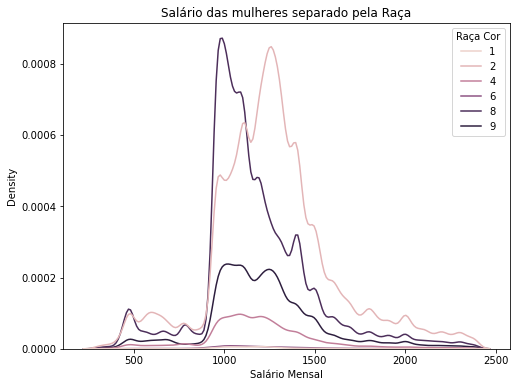

In [55]:
#Salário de mulheres pela Raça
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_query_fem, x='SalarioMensal', hue="Raça Cor", common_grid=True)
plt.title('Salário das mulheres separado pela Raça')
plt.xlabel('Salário Mensal')
plt.show()

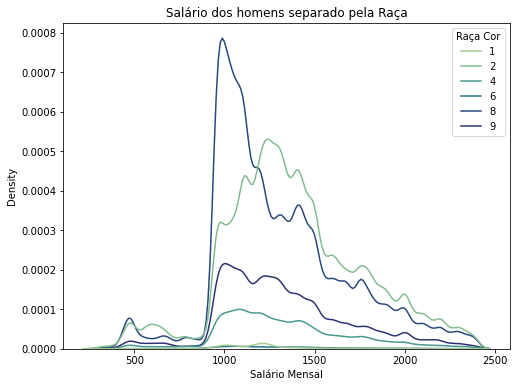

In [56]:
#Salário dos homens pela raça
plt.figure(figsize=(8,6))
sns.kdeplot(data=df_query_mas, x='SalarioMensal', hue="Raça Cor", palette="crest", common_grid=True)
plt.title('Salário dos homens separado pela Raça')
plt.xlabel('Salário Mensal')
plt.show()

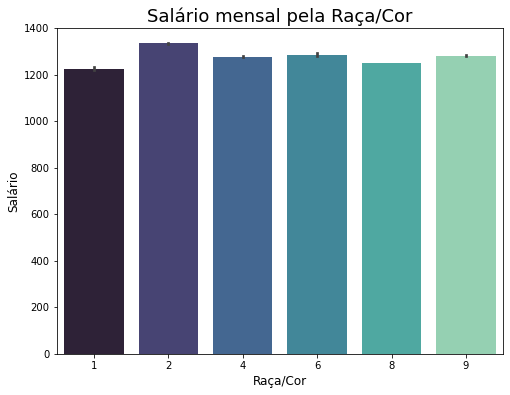

In [64]:
#Plot do Raça por Salário
plt.figure(figsize=(8, 6)) 
sns.barplot(x="Raca", y='SalarioMensal', data=df, palette='mako', ) 
  
plt.ylabel("Salário", size=12) 
plt.xlabel("Raça/Cor", size=12) 
plt.title("Salário mensal pela Raça/Cor", size=18) 
plt.show()

In [58]:
df = df.rename(columns = {'Raça Cor' : 'Raca'})

In [60]:
# Média Salárial pela Raça/Cor de pele

df_query_raca1 = pd.DataFrame(df.query('Raca == 1 & SalarioMensal > 1'))
df_query_raca2 = pd.DataFrame(df.query('Raca == 2 & SalarioMensal > 1'))
df_query_raca4 = pd.DataFrame(df.query('Raca == 4 & SalarioMensal > 1'))
df_query_raca6 = pd.DataFrame(df.query('Raca == 6 & SalarioMensal > 1'))
df_query_raca8 = pd.DataFrame(df.query('Raca == 8 & SalarioMensal > 1'))
df_query_raca9 = pd.DataFrame(df.query('Raca == 9 & SalarioMensal > 1'))


print(f'Média salarial - indigina',{round(df_query_raca1['SalarioMensal'].mean())})
print(f'Média salarial - Branca', {round(df_query_raca2['SalarioMensal'].mean())})
print(f'Média salarial - Preta',{round(df_query_raca4['SalarioMensal'].mean())})
print(f'Média salarial - Amarela',{round(df_query_raca6['SalarioMensal'].mean())})
print(f'Média salarial - Parda', {round(df_query_raca8['SalarioMensal'].mean())})
print(f'Média salarial - N/I',{round(df_query_raca9['SalarioMensal'].mean())})




Média salarial - indigina {1226}
Média salarial - Branca {1335}
Média salarial - Preta {1277}
Média salarial - Amarela {1286}
Média salarial - Parda {1251}
Média salarial - N/I {1282}


### Elaborar uma hipótese para ser rejeitada ou não-rejeitada por você de acordo com o resultado da sua análise, através da utilização dos dados do CAGED considerando as suas colunas.

# To be continue...
